# Creating a GLM using the Inspect API

This notebook will go through the process of creating a Generalised Linear Model using the Inspect API. It will show the power of linked data where data from different domains (economics, demography and education) will be merged together using linked data.

### Import packages

In [108]:
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
import seaborn as sns; sns.set()

## Using the Inspect command

By providing the file path to the metadata JSON file and using the inspector object we can explore the metadata and so treat the data correctly as the metadata is respected and machine readable.



In [31]:
from csvcubed.inspect.inspectortable import Inspector

median_pay = Inspector("/Users/abdulkasim/Desktop/family-ess/out/gross-median-weekly-pay/gross-median-weekly-pay/gross-median-weekly-pay.csv-metadata.json")
disposable_income = Inspector("/Users/abdulkasim/Desktop/family-ess/out/gross-disposable-household-income-per-head/gross-disposable-household-income-per-head/gross-disposable-household-income-per-head.csv-metadata.json")
qualifications = Inspector("/Users/abdulkasim/Desktop/family-ess/out/aged-16-to-64-years-level-3-or-above-qualifications/aged-16-to-64-years-level-3-or-above-qualifications/aged-16-to-64-years-level-3-or-above-qualifications.csv-metadata.json")
cigarette = Inspector("/Users/abdulkasim/Desktop/family-ess/out/cigarette-smokers/cigarette-smokers/cigarette-smokers.csv-metadata.json")
employment_rate = Inspector("/Users/abdulkasim/Desktop/family-ess/out/employment-rate-for-16-to-64-year-olds/employment-rate-for-16-to-64-year-olds/employment-rate-for-16-to-64-year-olds.csv-metadata.json")
children_literacy = Inspector("/Users/abdulkasim/Desktop/family-ess/out/children-at-expected-level-for-literacy-by-end-of-early-years-foundation-stage/children-at-expected-level-for-literacy-by-end-of-early-years-foundation-stage/children-at-expected-level-for-literacy-by-end-of-early-years-foundation-stage.csv-metadata.json")
apprenticeship_starts = Inspector("/Users/abdulkasim/Desktop/family-ess/out/apprenticeships-starts/apprenticeships-starts/apprenticeships-starts.csv-metadata.json")
gcses = Inspector("/Users/abdulkasim/Desktop/family-ess/out/gcses-and-equivalent-in-english-and-maths-by-age-19/gcses-and-equivalent-in-english-and-maths-by-age-19/gcses-and-equivalent-in-english-and-maths-by-age-19.csv-metadata.json")
reception_children_overweight = Inspector("/Users/abdulkasim/Desktop/family-ess/out/overweight-children-at-reception-age-aged-four-to-five-years/overweight-children-at-reception-age-aged-four-to-five-years/overweight-children-at-reception-age-aged-four-to-five-years.csv-metadata.json")
year6_children_overweight = Inspector("/Users/abdulkasim/Desktop/family-ess/out/overweight-children-at-year-6-age-aged-10-to-11-years/overweight-children-at-year-6-age-aged-10-to-11-years/overweight-children-at-year-6-age-aged-10-to-11-years.csv-metadata.json")

## Look into metadata of gross median pay dataset

Below we will look use some of the features the Inspect API facilitates which Sarah spoke about earlier.

### Exploring the data

In [109]:
from csvcubed.inspect.inspectorcolumns import DimensionColumn, MeasuresColumn, ObservationsColumn
dimension_col_title = [title for title, column in median_pay.tables[0].columns.items() if isinstance(column, DimensionColumn)]
dimension_col_title

['AREACD', 'Period']

In [110]:
value_col_title = [title for title, column in median_pay.tables[0].columns.items() if isinstance(column, ObservationsColumn)]
value_col_title

['Value']

Here we can identify the variables in data set by checking if a column is an instance of a DimensionColumn. This can be very useful when dealing with different data sets as changes are not required to be made to the python script.

In [111]:
primary_table_columns = median_pay.tables[0].columns
primary_table_columns

OrderedDict([('AREACD',
              DimensionColumn(dimension=LocalDimension(dimension_uri='gross-median-weekly-pay.csv#dimension/statistical-geography', label='Statistical Geography'))),
             ('AREANM', SuppressedColumn()),
             ('Geography', SuppressedColumn()),
             ('Variable Name', SuppressedColumn()),
             ('Indicator', SuppressedColumn()),
             ('Mission', SuppressedColumn()),
             ('Category', SuppressedColumn()),
             ('Period',
              DimensionColumn(dimension=LocalDimension(dimension_uri='gross-median-weekly-pay.csv#dimension/year', label='Year'))),
             ('Value',
              PivotedObservationsColumn(unit=LocalUnit(unit_uri='gross-median-weekly-pay.csv#unit/pounds-sterling', label='Pounds Sterling'), measure=LocalMeasure(measure_uri='gross-median-weekly-pay.csv#measure/gross-median-weekly-pay', label='Gross median weekly pay'))),
             ('Measure', SuppressedColumn()),
             ('Unit', Sup

One practical example of how these features are useful is using the metadata to differentiate between datasets when we merge multiple datasets together. When the csvw is imported the column with the all the values is called ‘Value’ (as seen on an earlier slide). However from the above metadata we can see the measure has a label which is ‘Gross median weekly pay’. We can use this to rename the column and how this is done is shown on the next slide.


## Load the CSV-W into a pandas DataFrame

In [139]:
median_pay_df, errors = median_pay.tables[0].data_cube_repository.get_dataframe(median_pay.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
disposable_income_df, errors = disposable_income.tables[0].data_cube_repository.get_dataframe(disposable_income.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
qualifications_df, errors = qualifications.tables[0].data_cube_repository.get_dataframe(qualifications.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
cigarette_df, errors = cigarette.tables[0].data_cube_repository.get_dataframe(cigarette.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
employment_rate_df, errors = employment_rate.tables[0].data_cube_repository.get_dataframe(employment_rate.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
children_literacy_df, errors = children_literacy.tables[0].data_cube_repository.get_dataframe(children_literacy.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False)
apprenticeship_starts_df, errors = apprenticeship_starts.tables[0].data_cube_repository.get_dataframe(apprenticeship_starts.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False) 
gcses_df, errors = gcses.tables[0].data_cube_repository.get_dataframe(gcses.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False) 
reception_children_overweight_df, errors = reception_children_overweight.tables[0].data_cube_repository.get_dataframe(reception_children_overweight.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False) 
year6_children_overweight_df, errors = year6_children_overweight.tables[0].data_cube_repository.get_dataframe(year6_children_overweight.tables[0].csv_url, include_suppressed_cols=False, dereference_uris=False) 

## Data transformations


Now that we have loaded a dataframe for each of the datasets. We now want to merge them together to then be able to create a GLM.

Before we get to creating a GLM we will need to make some transformations to each dataset.

For each dataset the following changes need to be made:
* Only return values for the most recent year
* Using the features of the Inspect API rename the value column to the measure label, so that after joining all datasets it is easily identifiable which column belongs to which dataset
* Merge all datasets together

In [140]:
median_pay_df.head()

,AREACD,Period,Value,Lower Confidence Interval (95%),Upper Confidence Interval (95%),Observation Status
0,k02000001,2002,324.8,324.6,325.0,NaN
1,k02000001,2022,532.5,532.3,532.7,NaN
2,k02000001,2021,505.1,504.9,505.3,NaN
3,k02000001,2020,479.1,479.0,479.2,NaN
4,k02000001,2019,479.1,479.0,479.2,NaN


In [141]:
csvws = [median_pay, disposable_income, qualifications, cigarette, employment_rate, children_literacy, apprenticeship_starts, gcses, reception_children_overweight, year6_children_overweight]
datasets = [median_pay_df, disposable_income_df, qualifications_df, cigarette_df, employment_rate_df, children_literacy_df, apprenticeship_starts_df, gcses_df, reception_children_overweight_df, year6_children_overweight_df]


modified_dataframes = []

for metadata, df in zip(csvws, datasets):
    columns = metadata.tables[0].columns
    measure_label = columns["Value"].measure.label

    df.rename(columns={"Value": f"{measure_label}"}, inplace=True)

    df["Period"] = df["Period"].astype(str).str[:4].astype(int)
    max_year = df["Period"].max()
    df = df[df["Period"] == max_year]
    df = df[['AREACD', f'{measure_label}']].reset_index(drop=True)

    modified_dataframes.append(df)


## Merge all dataframes one at a time

In [142]:
df = modified_dataframes[0]
for dataset in modified_dataframes[1:]:
    df = df.merge(dataset, on=['AREACD'], how='outer')

## EDA

In [143]:
df.head()

,AREACD,Gross median weekly pay,Gross disposable household income per head,Aged 16 to 64 years level 3 or above qualifications,Cigarette smokers,Employment rate for 16 to 64 year olds,Children at end of early years foundation stage for literacy,Number of apprenticeship starts,GCSEs (and equivalent) in English and maths by age 19,Reception age children (aged four to five years) who are overweight,Year 6 children (aged 10 to 11 years) who are overweight
0,k02000001,532.5,21440.0,61.4,13.3,75.5,NaN,NaN,NaN,NaN,NaN
1,k03000001,535.0,21561.0,61.5,NaN,75.6,NaN,NaN,NaN,NaN,NaN
2,k04000001,535.6,21730.0,61.2,NaN,75.7,NaN,NaN,NaN,NaN,NaN
3,e92000001,536.6,21962.0,61.4,13.0,75.8,68.0,549.0,74.89244,22.25472,37.75980
4,e12000001,490.6,17416.0,54.6,14.8,70.5,66.6,654.0,71.03308,24.94365,40.89117


In [144]:
df.shape

(451, 11)

In [145]:
df.describe()

,Gross median weekly pay,Gross disposable household income per head,Aged 16 to 64 years level 3 or above qualifications,Cigarette smokers,Employment rate for 16 to 64 year olds,Children at end of early years foundation stage for literacy,Number of apprenticeship starts,GCSEs (and equivalent) in English and maths by age 19,Reception age children (aged four to five years) who are overweight,Year 6 children (aged 10 to 11 years) who are overweight
count,421.000000,390.000000,419.000000,392.000000,395.000000,345.000000,342.000000,342.000000,353.000000,355.000000
mean,536.210214,21869.605128,60.468974,13.087245,76.096203,68.819130,580.342105,75.156757,21.968895,36.306697
std,64.121558,8525.826485,8.457249,3.693665,5.129833,4.080581,304.996115,5.436542,3.003593,5.056141
min,394.400000,13952.000000,37.800000,3.200000,61.800000,55.400000,140.000000,53.153153,12.903230,16.939890
25%,491.700000,18027.500000,54.900000,10.800000,72.700000,66.200000,475.000000,71.663541,20.000000,33.068645
50%,521.700000,20200.500000,60.200000,12.900000,76.100000,68.600000,570.500000,75.187662,22.000000,36.650870
75%,569.900000,23534.750000,65.800000,15.300000,79.400000,71.200000,649.250000,78.657559,24.027460,40.000000
max,833.100000,147813.000000,85.700000,27.800000,90.100000,80.000000,5412.000000,88.640777,28.915660,49.072750


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   AREACD                                                               451 non-null    object 
 1   Gross median weekly pay                                              421 non-null    float64
 2   Gross disposable household income per head                           390 non-null    float64
 3   Aged 16 to 64 years level 3 or above qualifications                  419 non-null    float64
 4   Cigarette smokers                                                    392 non-null    float64
 5   Employment rate for 16 to 64 year olds                               395 non-null    float64
 6   Children at end of early years foundation stage for literacy         345 non-null    float64
 7   Number o

For simplicity drop missing data.

In [147]:
df.isna().sum() 

AREACD                                                                   0
Gross median weekly pay                                                 30
Gross disposable household income per head                              61
Aged 16 to 64 years level 3 or above qualifications                     32
Cigarette smokers                                                       59
Employment rate for 16 to 64 year olds                                  56
Children at end of early years foundation stage for literacy           106
Number of apprenticeship starts                                        109
GCSEs (and equivalent) in English and maths by age 19                  109
Reception age children (aged four to five years) who are overweight     98
Year 6 children (aged 10 to 11 years) who are overweight                96
dtype: int64

In [148]:
df = df.dropna().reset_index(drop=True)

## Rename columns for visualisations

Rename columns to improve readability of visualisations as some of the variable names are long and so overlap with others.

In [149]:
pairplot_df = df.copy()
pairplot_df.columns = ['areacd',
       'median pay',
       'disposable income',
       '16 to 64 qualifications',
       'cigarette smokers',
       'employment rate',
       'children for literacy',
       'apprenticeship starts',
       'GCSEs',
       'reception children overweight',
       'year 6 children overweight']


In [150]:
features = pairplot_df.iloc[:,1:]

/Users/abdulkasim/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


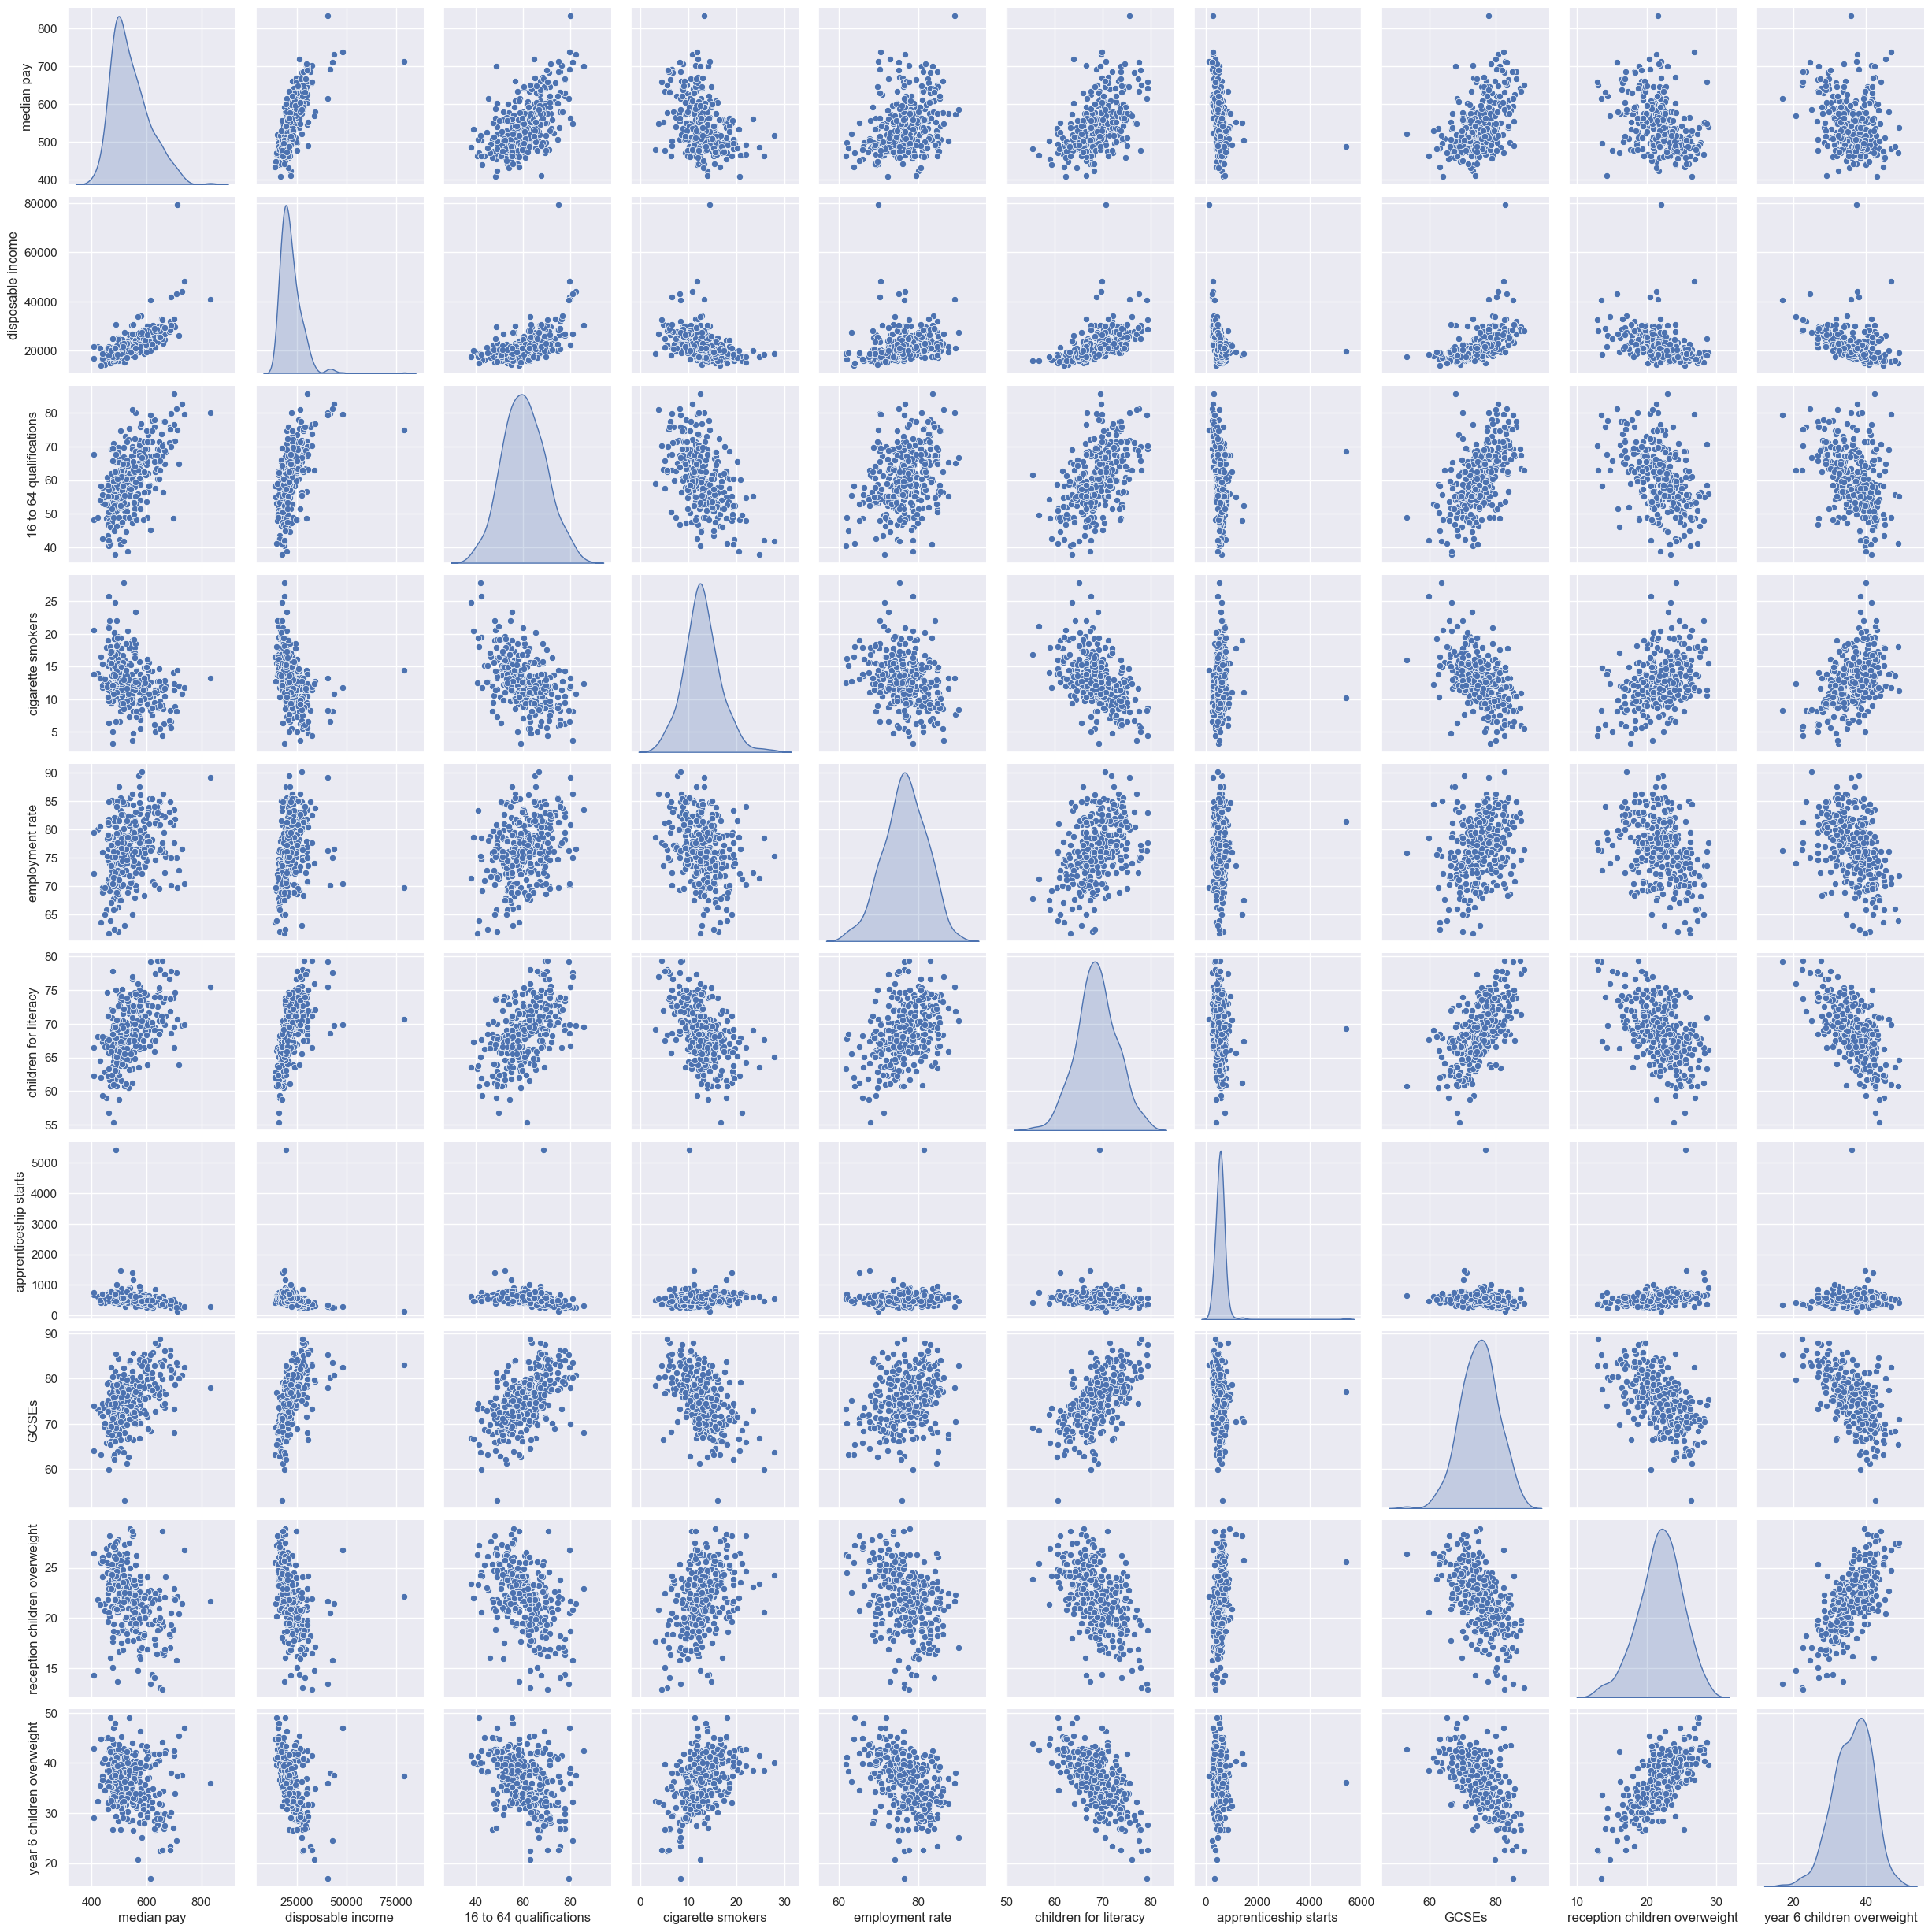

In [151]:
pairplot = sns.pairplot(data=pairplot_df, diag_kind="kde")
pairplot;

## Correlation Matrix

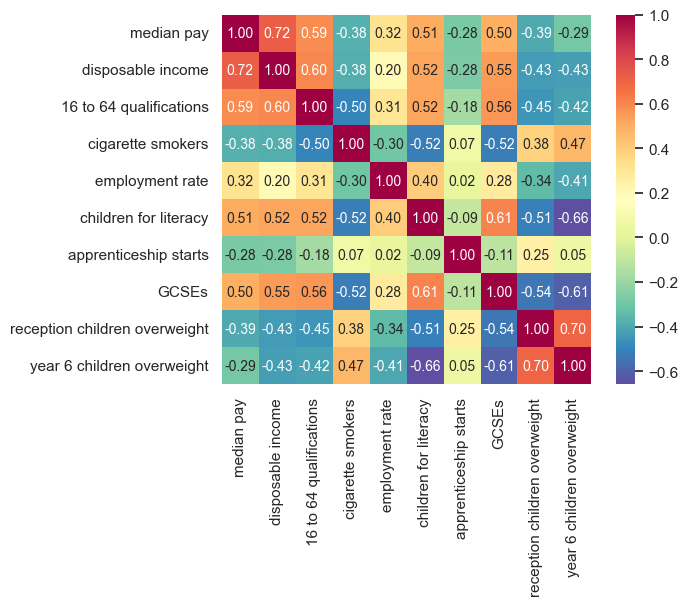

In [152]:
corrmat = features.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True,
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=features.columns, 
                 xticklabels=features.columns, 
                 cmap="Spectral_r"
)
plt.show()

## Standardize data

In [153]:
df.columns = df.columns.str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.lower()

from sklearn.preprocessing import StandardScaler
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=df.columns[2:])


In [154]:
dfcols = df[["areacd", "gross_median_weekly_pay"]]
data = pd.concat([dfcols, x], axis=1)

## GLM

In [155]:
data.head()

,areacd,gross_median_weekly_pay,gross_disposable_household_income_per_head,aged_16_to_64_years_level_3_or_above_qualifications,cigarette_smokers,employment_rate_for_16_to_64_year_olds,children_at_end_of_early_years_foundation_stage_for_literacy,number_of_apprenticeship_starts,gcses_and_equivalent_in_english_and_maths_by_age_19,reception_age_children_aged_four_to_five_years_who_are_overweight,year_6_children_aged_10_to_11_years_who_are_overweight
0,e92000001,536.6,-0.032226,0.108791,0.041569,-0.144497,-0.172411,-0.095448,-0.040162,0.097651,0.274291
1,e12000001,490.6,-0.786039,-0.650140,0.521484,-1.139544,-0.510445,0.237733,-0.727370,0.969744,0.873373
2,e06000047,489.2,-0.884204,-0.884516,0.894752,-0.820378,-0.365573,0.478892,-0.958034,0.631260,0.656173
3,e06000005,482.2,-0.670298,0.030665,-0.598319,0.005698,-0.244847,0.577259,0.140447,1.374125,0.450939
4,e06000001,498.3,-0.916871,-0.449247,1.188034,-1.571357,-0.220702,0.231386,-0.989514,1.879494,1.311612


In [156]:
model = smf.glm(formula = "gross_median_weekly_pay ~ gross_disposable_household_income_per_head + aged_16_to_64_years_level_3_or_above_qualifications + cigarette_smokers + employment_rate_for_16_to_64_year_olds + children_at_end_of_early_years_foundation_stage_for_literacy + number_of_apprenticeship_starts + gcses_and_equivalent_in_english_and_maths_by_age_19 + reception_age_children_aged_four_to_five_years_who_are_overweight + year_6_children_aged_10_to_11_years_who_are_overweight",
                data = data, 
                family = sm.families.Gaussian())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict()

                    Generalized Linear Model Regression Results                    
Dep. Variable:     gross_median_weekly_pay   No. Observations:                  313
Model:                                 GLM   Df Residuals:                      303
Model Family:                     Gaussian   Df Model:                            9
Link Function:                    Identity   Scale:                          1823.2
Method:                               IRLS   Log-Likelihood:                -1614.1
Date:                     Wed, 06 Sep 2023   Deviance:                   5.5244e+05
Time:                             23:12:48   Pearson chi2:                 5.52e+05
No. Iterations:                          3   Pseudo R-squ. (CS):             0.7932
Covariance Type:                 nonrobust                                         
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

## Findings

We conducted a Generalized Linear Model (GLM) analysis with the help of a linked data package to collate the data together.

The GLM was conducted to explore the relationship between our dependent variable - gross median weekly pay and nine independent variables - gross disposable household income per head, aged 16 to 64 years level 3 or above qualifications, cigarette smokers, employment rate for 16 to 64 year olds, children at end of early years foundation stage for literacy, number of apprenticeship starts, gcses and equivalent in english and maths by age 19, reception age children aged four to five years who are overweight and, year 6 children aged 10 to 11 years who are overweight. 

The results revealed several significant relationships between the independent and dependent variables. Notably, gross disposable household income per head and year 6 children aged 10 to 11 years who are overweight demonstrated strong positive correlations with the dependent variable, suggesting that increases in these factors are linked to higher values of gross median weekly pay. 

Conversely, reception age children aged four to five years who are overweight and number of apprenticeship starts displayed negative coefficients, implying that higher values of these predictors are associated with lower values of gross median weekly pay.

It's important to note that while our model explained a substantial portion of the variance in the dependent variable (0.7925), there may still be unaccounted factors influencing the outcome. These findings provide valuable insights into the relationship between the independent and dependent variables, highlighting potential areas for further investigation.

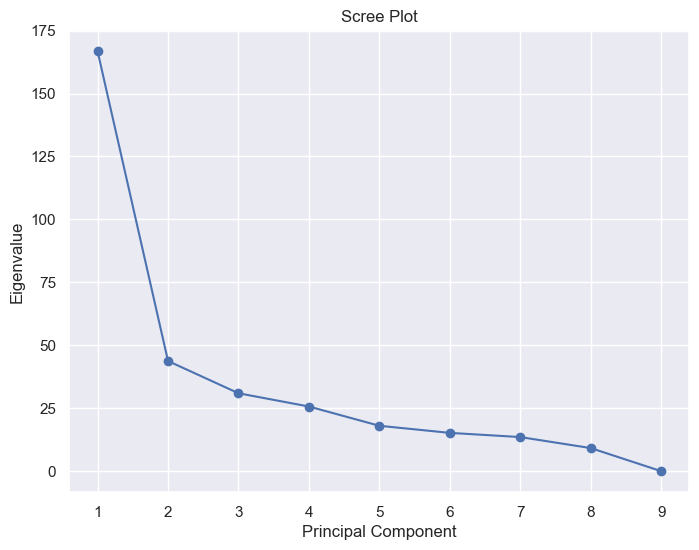

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = data.iloc[:, 2:].to_numpy()
combined_data = np.column_stack(features)

# Perform PCA
pca = PCA()
pca.fit(combined_data)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()